In [2]:
import numpy as np
import cv2


In [18]:

# Load an color image in grayscale
img = cv2.imread('rgb.jpg',1)

In [14]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
cv2.imwrite('messigray.png',img)


True

In [23]:
import numpy as np
import cv2
img = cv2.imread('rgb.jpg',1)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27: # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    v2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()


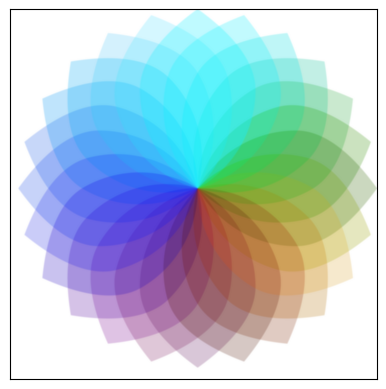

In [32]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('rgb.jpg',1)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [68]:
#camera
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    #사각형
    frame= cv2.rectangle(frame,(384,0),(510,128),(200,200,150),3)
    #원
    frame= cv2.circle(frame,(447,63), 63, (0,80,250), -1)
    #Our operations on the frame come here
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame',frame) #('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [62]:
#camera
import numpy as np
import cv2
cap = cv2.VideoCapture('Sample.avi')
while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [69]:
#camera
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)
        # write the flipped frame
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows() 

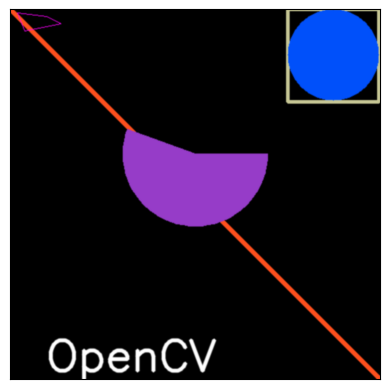

In [61]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,80,30),5)
#사각형
img = cv2.rectangle(img,(384,0),(510,128),(200,200,150),3)
#원
img = cv2.circle(img,(447,63), 63, (0,80,250), -1)
#타원
img = cv2.ellipse(img,(256,200),(100,100),0,0,200,(150,60,200),-1,)

#폴리곤
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(255,0,255))
#글자
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(50,500), font, 2,(255,255,255),4,cv2.LINE_AA)

#출력
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [71]:
import cv2
import numpy as np
import random as rd
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),30,(rd.randrange(0,255),rd.randrange(0,255),rd.randrange(0,255)),3)

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [82]:
import cv2
import numpy as np
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(150,30,200),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(rd.randrange(0,255),rd.randrange(0,255),rd.randrange(0,255)),-1)
        else:
            cv2.circle(img,(x,y),5,(rd.randrange(0,255),rd.randrange(0,255),rd.randrange(0,255)),-1)

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()


In [80]:
import cv2
import numpy as np
def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)

cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()